In [24]:
## ProductionTank 2503 - 10 Tonne Capacity 

## Importing all the necessary libraries

In [25]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

### Upload CSV File 

In [26]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [27]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [28]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

### Filter the ProductionTank df to show only 2503 production results

In [29]:
ProductionTank2503_df= ProductionTank.query('Tank_1 == "%s"' % 2503)
print(ProductionTank2503_df) 

      Material    BATCHID Tank_1  \
0      1002150  107643491   2503   
1      1002150  107643491   2503   
2      1002150  107643491   2503   
3      1002150  107643491   2503   
4      1002150  107643491   2503   
...        ...        ...    ...   
9447   3044756  108041496   2503   
9448   3044756  108041496   2503   
9449   3044756  108041496   2503   
9450   3044756  108041496   2503   
9451   3044756  108041496   2503   

                                   Instruction_Step INGRED_ID  \
0                              S3_BATCH_IN_PROGRESS       NaN   
1                                        STEP1_CONS   1002565   
2                       PLEASE VERIFY BULK ADDITION       NaN   
3                                        STEP1_CONS   1037802   
4                                        STEP1_CONS   1002818   
...                                             ...       ...   
9447                        SELECT_DESTINATION_TANK       NaN   
9448                   S4_BATCH_COMPLETE_QA_PEN

### Filter the ProductionTank2503_df by Material and Material_Name columns

NB: Looking at ingredients ( Material_Name ) addition in the material production in this tank 2503

In [30]:
# Group by the 'Material','Material_Name' column
grouped = ProductionTank2503_df.groupby(['Material'])

grouped.head()
# Apply aggregation functions to the grouped data
#mean_values = grouped.mean()
#sum_values = grouped['Quantity'].sum()
#count_values = grouped['Phase_duration'].count()

#print("Mean Values:")
#print(mean_values)

#print("\nSum Values:")
#print(sum_values)

#print("\nCount Values:")
#print(count_values)

,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,3044756,107588998,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,25/01/2022 20:53,25/01/2022 20:53,0,0,1,0.0000,NaN,0,NaN,0
9112,3044756,107588998,2503,STEP1_CONS,1002565,WATER TREATED,6279.000,25/01/2022 21:16,25/01/2022 22:18,62,23,2,101.2742,733.5050,9,53.0,0
9113,3044756,107588998,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,25/01/2022 22:18,25/01/2022 22:22,4,0,3,0.0000,NaN,3,1.0,0
9114,3044756,107588998,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,13.347,25/01/2022 22:22,25/01/2022 22:36,14,0,4,0.9534,6.3182,2,12.0,0


### Aggregation of data per tank : by Material

In [31]:
#Aggregate data per tank
aggregated_ProductionTank2503_df = ProductionTank2503_df.groupby(['Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2503_df)

### Aggregation of data per tank : by BATCHID

In [32]:
#Aggregate data per tank
aggregated_ProductionTank2503_df1 = ProductionTank2503_df.groupby(['BATCHID','Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2503_df1)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548288   1206154             546      16.000000          14.850000   
1   107563460   1779699             386      63.666667           0.800000   
2   107582580   1172415            1865      70.789474          31.695652   
3   107588998   3044756             866      25.235294          22.190476   
4   107591055   1399322             227      13.666667           0.400000   
..        ...       ...             ...            ...                ...   
92  108068558   1172415             907      18.600000         127.125000   
93  108075715   1206154            1788      80.666667         133.045455   
94  108083245   1172415             370      18.666667           1.000000   
95  108083247   1418373             370      18.333333           0.600000   
96  108091251   1172919             443      19.333333           0.600000   

    Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0         177.

### Data Visualisation 

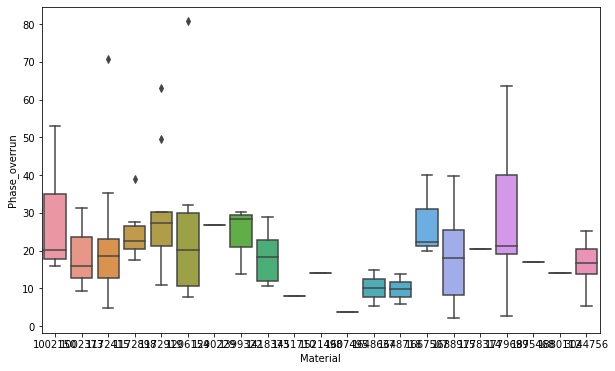

In [33]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2503_df1, x='Material', y='Phase_overrun')
plt.show()

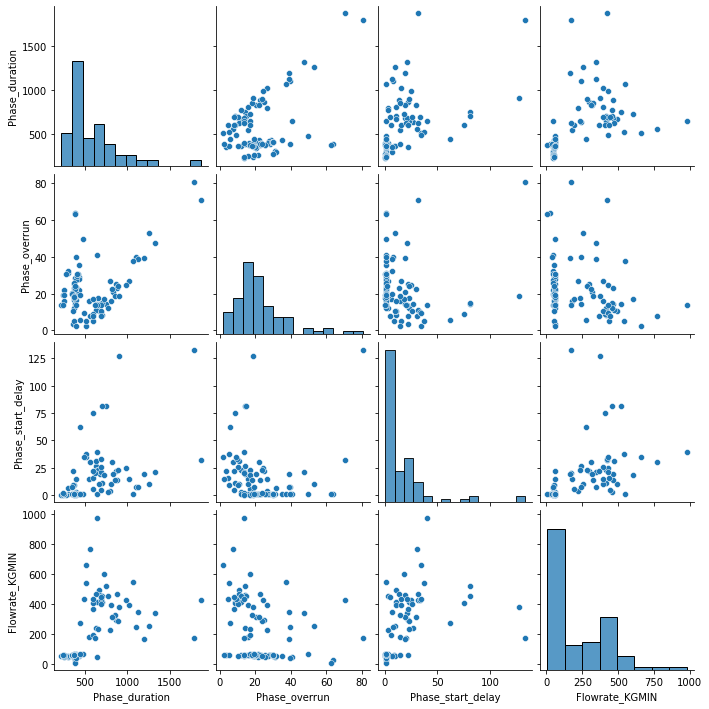

In [34]:
# Pair plot to visualize relationships between numeric variables
numeric_columns = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
sns.pairplot(aggregated_ProductionTank2503_df1[numeric_columns])
plt.show()

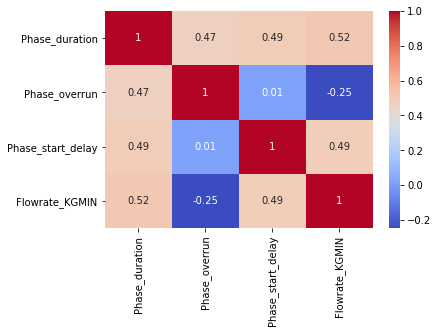

In [35]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = aggregated_ProductionTank2503_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [36]:
aggregated_ProductionTank2503_df1.info

<bound method DataFrame.info of       BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548288   1206154             546      16.000000          14.850000   
1   107563460   1779699             386      63.666667           0.800000   
2   107582580   1172415            1865      70.789474          31.695652   
3   107588998   3044756             866      25.235294          22.190476   
4   107591055   1399322             227      13.666667           0.400000   
..        ...       ...             ...            ...                ...   
92  108068558   1172415             907      18.600000         127.125000   
93  108075715   1206154            1788      80.666667         133.045455   
94  108083245   1172415             370      18.666667           1.000000   
95  108083247   1418373             370      18.333333           0.600000   
96  108091251   1172919             443      19.333333           0.600000   

    Flowrate_KGMIN  Target_Phase_duration  

In [37]:
# Handling missing values
aggregated_ProductionTank2503_df1.dropna(inplace=True)  # Remove rows with missing values

In [38]:
# Handling duplicates
aggregated_ProductionTank2503_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [39]:
print(aggregated_ProductionTank2503_df1.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107548288   1206154             546      16.000000          14.850000   
1  107563460   1779699             386      63.666667           0.800000   
2  107582580   1172415            1865      70.789474          31.695652   
3  107588998   3044756             866      25.235294          22.190476   
4  107591055   1399322             227      13.666667           0.400000   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0        177.0312              16.300000       112.948186  
1         23.9456              40.800000        52.856500  
2        424.0438              23.391304        90.810145  
3        293.3311              21.666667       145.912750  
4         48.8225              39.000000        52.856500  


In [40]:
# Define columns where you want to detect and remove outliers
ProductionTank2503_df = pd.DataFrame(aggregated_ProductionTank2503_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2503_df = remove_outliers_iqr(ProductionTank2503_df, col)

# Display the cleaned DataFrame
print(ProductionTank2503_df)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548288   1206154             546      16.000000          14.850000   
3   107588998   3044756             866      25.235294          22.190476   
4   107591055   1399322             227      13.666667           0.400000   
5   107591591   1002373             310      31.333333           1.000000   
6   107591594   1290229             796      26.866667           3.421053   
..        ...       ...             ...            ...                ...   
90  108057688   1688915             394      39.666667           0.800000   
91  108067054   1002150             378      17.333333           0.400000   
94  108083245   1172415             370      18.666667           1.000000   
95  108083247   1418373             370      18.333333           0.600000   
96  108091251   1172919             443      19.333333           0.600000   

    Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0         177.

In [41]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank2503_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank2503_df.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  9.700000e+01  9.700000e+01       97.000000      97.000000   
mean   1.078264e+08  1.563946e+06      584.567010      22.278264   
std    1.635974e+05  5.920216e+05      305.422177      14.320367   
min    1.075483e+08  1.002150e+06      227.000000       2.142857   
25%    1.076604e+08  1.172898e+06      384.000000      13.944444   
50%    1.078292e+08  1.399322e+06      443.000000      19.333333   
75%    1.079634e+08  1.688915e+06      693.000000      26.866667   
max    1.080913e+08  3.044756e+06     1865.000000      80.666667   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          97.000000       97.000000              97.000000   
mean           14.885776      215.244367              43.260167   
std            24.007506      202.826407              22.854647   
min             0.400000        6.125200              13.730769   
25%          

In [42]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2503_df[numerical_cols] = scaler.fit_transform(ProductionTank2503_df[numerical_cols])
print(ProductionTank2503_df.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107548288   1206154        0.074574      -0.390973           0.522335   
3  107588998   3044756        1.535255       0.643198           1.197072   
4  107591055   1399322       -1.381542      -0.652261          -0.805910   
5  107591591   1002373       -1.002678       1.326059          -0.750758   
6  107591594   1290229        1.215731       0.825880          -0.528215   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0       -0.109768              16.300000       112.948186  
3        0.506504              21.666667       145.912750  
4       -0.789144              39.000000        52.856500  
5       -0.807894              45.000000        61.945500  
6        0.132995              22.473684       137.957557  


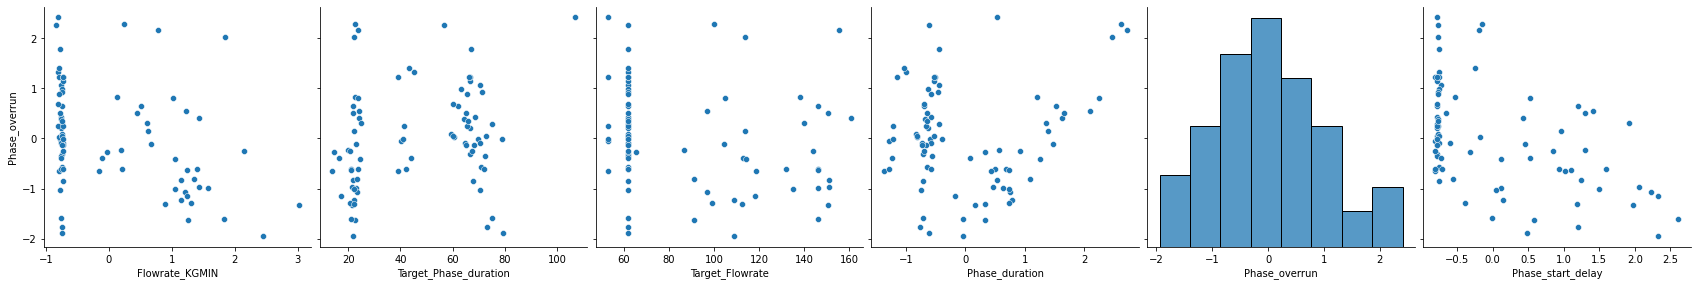

In [43]:
#Step 3: Visualization
#Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition. Also, plotting a heatmap for all the variables,

#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(ProductionTank2503_df, x_vars=['Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_duration','Phase_overrun','Phase_start_delay'], y_vars = 'Phase_overrun', size = 4, kind = 'scatter' )
plt.show()

### Applying Machine Learning Algorithms 

In [44]:
#pip install lightgbm

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate
# Load your dataset (replace 'ProductionTank2503_df' with your actual dataset)
df = pd.DataFrame(ProductionTank2503_df)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2503results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           |  0.495612   |   0.474788 |  0.51369   |  0.470476 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            |  0.496302   |   0.472143 |  0.513014  |  0.473426 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            |  0.92709    |   0.98672  |  0.0903117 | -0.100473 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     |  0.0687184  |   0.265206 |  0.932571  |  0.70422  |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost

In [46]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

LinearRegression:
  Mean MSE: 0.637675
  Std MSE: 0.153914

Ridge:
  Mean MSE: 0.638984
  Std MSE: 0.163884

Lasso:
  Mean MSE: 1.170710
  Std MSE: 0.454368

RandomForestRegressor:
  Mean MSE: 0.426688
  Std MSE: 0.160769

GradientBoostingRegressor:
  Mean MSE: 0.367750
  Std MSE: 0.142543

SVR:
  Mean MSE: 1.049288
  Std MSE: 0.293720

MLPRegressor:
  Mean MSE: 4358107957328.088867
  Std MSE: 3270714437628.168457

DecisionTreeRegressor:
  Mean MSE: 0.786102
  Std MSE: 0.554675



In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2503_df' with your actual dataset)
df = pd.DataFrame(ProductionTank2503_df)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2503 TUN results.xlsx', index=False)

+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           | 0.495612    |   0.474788 |   0.51369  |  0.470476 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            | 0.527862    |   0.504172 |   0.482046 |  0.437705 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            | 0.49652     |   0.471477 |   0.512799 |  0.474169 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     | 0.0627933   |   0.256106 |   0.938385 |  0.714369 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost